# Guía 5 - Ejercicio 3.2
En este ejercicio se realiza la construcción de un filtro de énfasis alta frecuencia y otro de alta potencia. Ambos se definen en frecuencia, utilizando un filtro pasa altos en frecuencia y se aplican a la imagen del camaleón. Se probaron múltiples valores para el filtrado de las imágenes resultantes.

# Imports y funciones

In [83]:
import numpy as np
from scipy.fft import fft2, fftshift,ifft2, ifftshift
import matplotlib.pyplot as plt
import cv2 as cv

#---------------------------------------------Funciones-------------------------------------------------

def calcular_TDF(imagen):
    return np.fft.fftshift(np.fft.fft2(imagen))

#Máscara de filtrado del dominio espacial
def filtro_pasa_altos(imagen):
    
    mascara_cruz = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]], dtype=np.float32)
    
    imagen_filtrada = cv.filter2D(imagen, -1, mascara_cruz)
    
    return imagen_filtrada

def pasa_altos(shape):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    r = 100  
    center = (crow, ccol)
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
    mask[mask_area] = 0
    return mask

def filtro_alta_potencia(filtro_pasa_altos, A):

    H_alta_potencia = (A - 1) + filtro_pasa_altos

    return H_alta_potencia

def filtro_enfasis_alta_frecuencia(filtro_pasa_altos, a, b):     
    
    H_enfasis_alta_frecuencia = a + b * filtro_pasa_altos

    return H_enfasis_alta_frecuencia

In [84]:

imagen = cv.imread('Imagenes/camaleon.tif',cv.IMREAD_GRAYSCALE)
imagen_TDF = fftshift(fft2(imagen))

#---------------------------------------------Filtrados HAP y HEAF-------------------------------------------------
filtro = pasa_altos(imagen.shape)

A = 2 # HAP
a = 5  # HEAF
b = 5    # HEAF

HAP = filtro_alta_potencia(filtro,A)
HEAF = filtro_enfasis_alta_frecuencia(filtro, a, b)

imagen_fft = calcular_TDF(imagen)

imagen_filtrada_HAP_fft = imagen_fft*HAP
imagen_filtrada_HAP = np.abs(np.fft.ifft2(np.fft.ifftshift(imagen_filtrada_HAP_fft)))

imagen_filtrada_HEAF_fft = imagen_fft*HEAF
imagen_filtrada_HEAF = np.abs(np.fft.ifft2(np.fft.ifftshift(imagen_filtrada_HEAF_fft)))


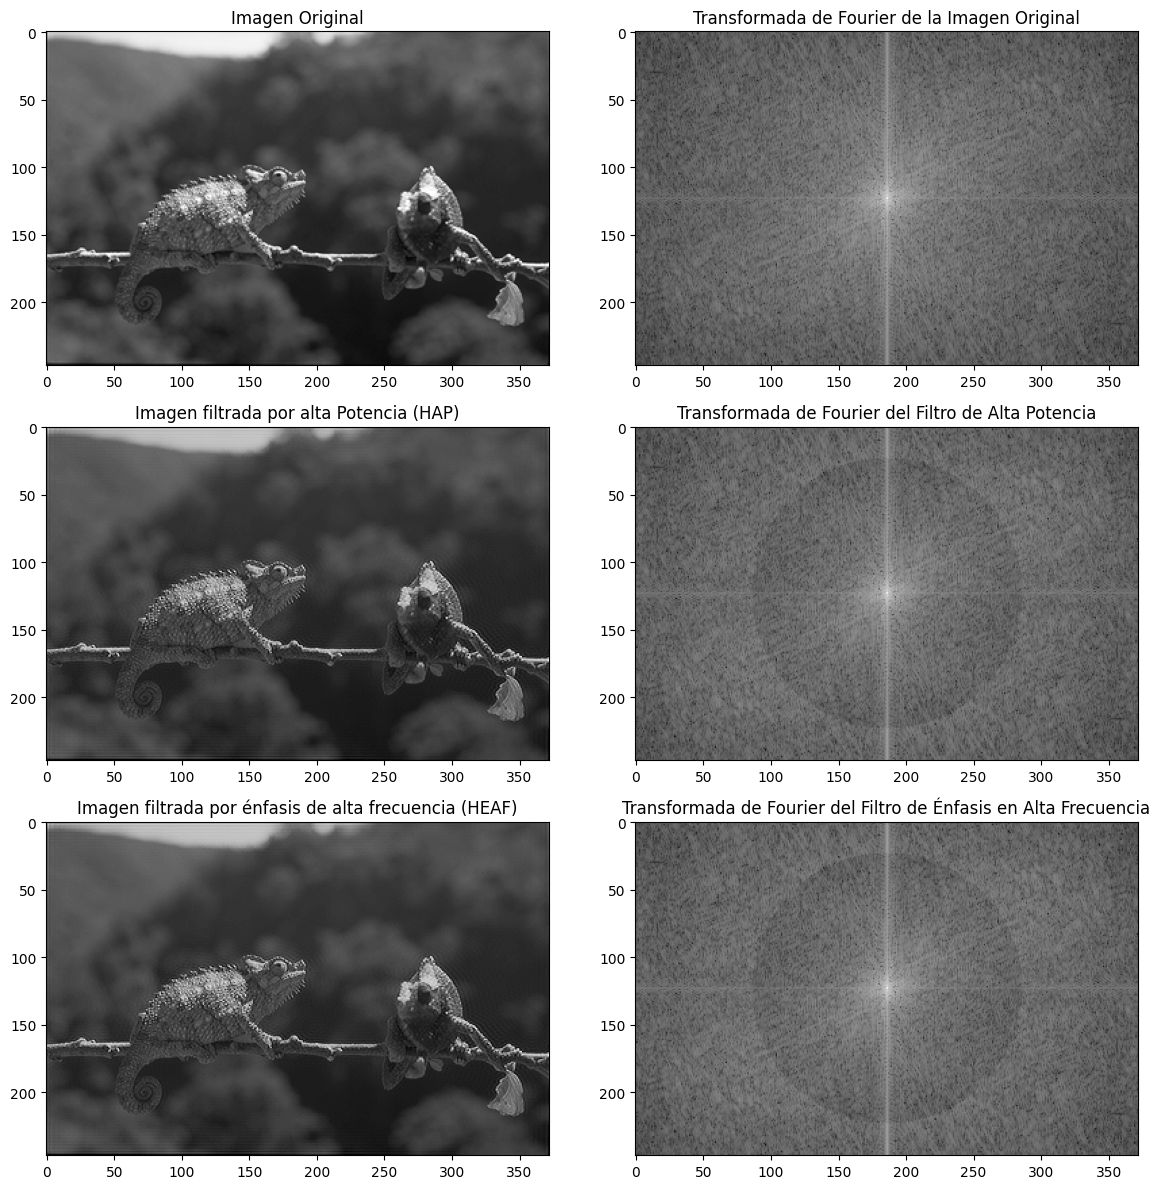

In [85]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

axs[0, 0].imshow(imagen, cmap='gray')
axs[0, 0].set_title('Imagen Original')

axs[0, 1].imshow(np.log(1 + np.abs(imagen_TDF)), cmap='gray')
axs[0, 1].set_title('Transformada de Fourier de la Imagen Original')

axs[1, 0].imshow(imagen_filtrada_HAP, cmap='gray')
axs[1, 0].set_title('Imagen filtrada por alta Potencia (HAP)')

axs[1, 1].imshow(np.log(1 + np.abs(imagen_filtrada_HAP_fft)), cmap='gray')
axs[1, 1].set_title('Transformada de Fourier del Filtro de Alta Potencia')

axs[2, 0].imshow(imagen_filtrada_HEAF, cmap='gray')
axs[2, 0].set_title('Imagen filtrada por énfasis de alta frecuencia (HEAF)')

axs[2, 1].imshow(np.log(1 + np.abs(imagen_filtrada_HEAF_fft)), cmap='gray')
axs[2, 1].set_title('Transformada de Fourier del Filtro de Énfasis en Alta Frecuencia')

plt.tight_layout()
plt.show()